<a href="https://colab.research.google.com/github/marcoantonioaragon/aragon-marco/blob/sample_size/sample_size_proportion_ttest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações

In [1]:
#Import Libraries

# Built-in libraries
from datetime import datetime
import random
import math

# Third-party libraries
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from statsmodels.stats.power import TTestIndPower, tt_ind_solve_power
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_chisquare, confint_proportions_2indep

# Desenho do experimento

Definição de tamanho de amostra e tempo de duração para proporção utilizando teste t para duas amostras e cohen D para tamanho de efeito

In [33]:
#Faça a média a quantidade de conversões das últimas 4 semanas
conv_avg = (240 + 258 + 316 + 218 + 187)/4

In [34]:
#Faça a média a quantidade de usuários únicos das últimas 4 semanas
user_avg = (1490 +1012 + 1582 + 1322)/4

In [35]:
#Divida a média de conversões pela média de usuários e encontre a proporção
baseline = conv_avg/user_avg

0.22549019607843138

In [37]:
#Defina os parâmetros do experimento
alpha = 0.1                                                                 #Inclua a probabilidade de falso positivo
power = 0.7                                                                 #Inclua a probabilidade de detectarmos um efeito caso ele exista
mde = 0.1                                                                   #Minimo efeito para se detectar e declarar validade estatística
baseline = baseline                                                         #Métrica atual, calculada acima
tratamento = baseline + (baseline * mde)                                    #Métrica com aumento esperado
variantes = 2                                                               #Quantidade de variantes
alternative = 'smaller'                                                     #Definição de caudas do teste (two-sided, smaller(one-sided))
visitas_semanais = [1582, (1528 + 1012), (1528 + 1012 + 1490), (1528 + 1012 + 1490 + 1322), (1528 + 1012 + 1490 + 1322 + 931)]           #Usuários únicos acumulado semanalmente [semana 1, semana 1 + semana 2, etc]

Não é necessário manipular nada no código abaixo


In [30]:
#Calcule de tamanho do efeito utilizando Cohen D
cohen_D = sm.stats.proportion_effectsize(baseline, tratamento)

#Calcule o tamanho de amostra estimado por grupo no teste t para duas amostras
n = tt_ind_solve_power(effect_size=cohen_D, power=power, alpha=alpha, alternative=alternative)
n = int(round(n))

print(f'Para detectar um efeito de {100*mde:.2f}%, ou seja, sair de {baseline*100:.2f}% para, no mínimo, {tratamento*100:.2f}%, '
      f'o tamanho amostral é de {n} usuários únicos em cada variante.'
      f'\nO tamanho de amostra total necessário para o experimento é de {variantes*n}.')

#Identifique a semana em que o tamanho amostral necessário é atingido
week_reached = 0
for i in range(len(visitas_semanais)):
    if visitas_semanais[i] >= n*variantes:
        week_reached = i + 1
        break

#Exibe o resultado
if week_reached:
    print(f"\nDe acordo com o tráfego atual, o tamanho amostral de {n*variantes} usuários será atingido na {week_reached}ª semana do experimento.")
else:
    print(f"\nO tamanho amostral de {n*variantes} usuários não será atingido dentro das semanas de dados fornecidas.")

Para detectar um efeito de 10.00%, ou seja, sair de 19.23% para, no mínimo, 21.15%, o tamanho amostral é de 2841 usuários únicos em cada variante.
O tamanho de amostra total necessário para o experimento é de 5682.

De acordo com o tráfego atual, o tamanho amostral de 5682 usuários será atingido na 5ª semana do experimento.


In [31]:
#Mostre o número de usuários necessários por semana.
print(f'Para o experimento rodar em 6 semana, seriam necessários {np.ceil(n*variantes/42)*7:.0f} usuários totais por semana')
print(f'Para o experimento rodar em 5 semana, seriam necessários {np.ceil(n*variantes/35)*7:.0f} usuários totais por semana')
print(f'Para o experimento rodar em 4 semana, seriam necessários {np.ceil(n*variantes/28)*7:.0f} usuários totais por semana')
print(f'Para o experimento rodar em 3 semana, seriam necessários {np.ceil(n*variantes/21)*7:.0f} usuários totais por semana')
print(f'Para o experimento rodar em 2 semana, seriam necessários {np.ceil(n*variantes/14)*7:.0f} usuários totais por semana')
print(f'Para o experimento rodar em 1 semana, seriam necessários {np.ceil(n*variantes/7)*7:.0f} usuários totais por semana')

Para o experimento rodar em 6 semana, seriam necessários 952 usuários totais por semana
Para o experimento rodar em 5 semana, seriam necessários 1141 usuários totais por semana
Para o experimento rodar em 4 semana, seriam necessários 1421 usuários totais por semana
Para o experimento rodar em 3 semana, seriam necessários 1897 usuários totais por semana
Para o experimento rodar em 2 semana, seriam necessários 2842 usuários totais por semana
Para o experimento rodar em 1 semana, seriam necessários 5684 usuários totais por semana


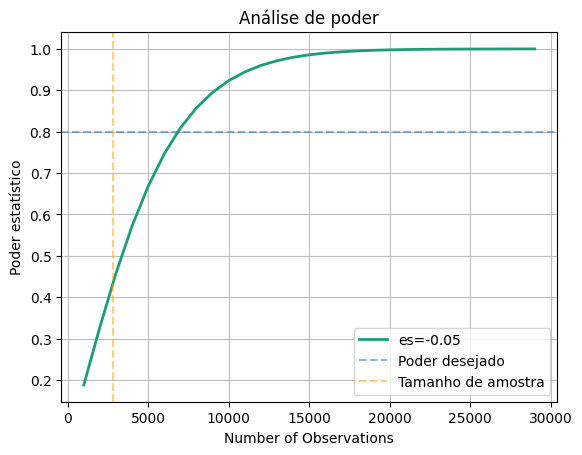

In [32]:
# Explorar poder de acordo com amostra
ttest_power = TTestIndPower()
ttest_power.plot_power(dep_var='nobs', nobs=np.arange(1000,30000,1000), effect_size=[cohen_D], title='Análise de poder')

# Plota gráfico com parâmetros
plt.axhline(0.8, linestyle='--', label='Poder desejado', alpha=0.5)
plt.axvline(n, linestyle='--', color='orange', label='Tamanho de amostra', alpha=0.5)
plt.ylabel('Poder estatístico')
plt.grid(alpha=0.8)
plt.legend()
plt.show()